In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Linear SVM Classification

## Soft Margin Classification

Hard margin classification is where we strictly impose all training instances be off the margin and so we cannot have any instances inside the margin i.e. no margin violations. This approach has a few problems, firstly the data must be linearly separable so we cannot have outliers from one class overlapping with the instances from the other class. In general hard margin classification is sensitive to outliers. This approach most often leads to overfitting. A better alternative is to use a soft margin classification where we try to use a wide margin and allow for some margin violations. In scikit-learn we can use the parameter C to regularize an SVM classifier. A low C value leads to a wider margin but more violations while a higher C value leads to a more narrow margin. If an SVM model is overfitting we can regularize by reducing C.

## Implementation in Scikit-Learn

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, 2:] # petal length, petal width
y = (iris["target"] == 2).astype(int) # 1 for Iris-Virginica and 0 for the rest

In [5]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC", LinearSVC(C=1, loss="hinge")),
])

In [6]:
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', LinearSVC(C=1, loss='hinge'))])

In [7]:
pipeline.predict([[5.3, 2.5]]) # predicts Iris-Virginica

array([1])

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
m = X.shape[0]
C=1
sgd_clf = SGDClassifier(loss="hinge", alpha=1/(m*C)) # Usually does not converge as fast as LinearSVC but can be useful for
                                                     # large training sets

In [10]:
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.006666666666666667)

In [11]:
sgd_clf.predict([[5.3, 2.5]])

array([1])

# Nonlinear SVM Classification

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [13]:
moons = datasets.make_moons(noise=0.2, random_state=3)
X, y = moons

In [14]:
poly_svm_clf = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
     ("svm", LinearSVC(max_iter = 10000, C=10, loss="hinge")),
])

In [15]:
poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge', max_iter=10000))])

## Plotting the Decision Boundary

In [16]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1, 2, 0.01))
Z = poly_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

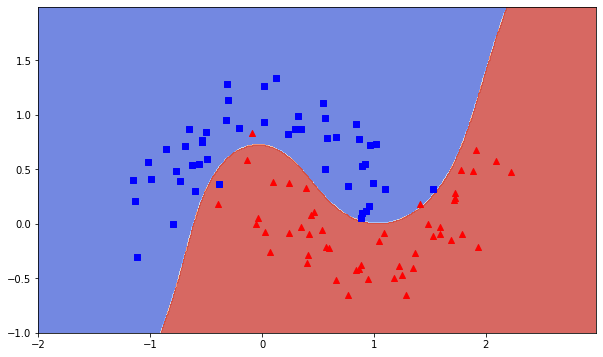

In [17]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="r", marker="^")
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="b", marker="s")
plt.show()

## Polynomial Kernel

Above we added polynomial features to our dataset. Using a low degree means it become difficult to deal with highly complex and non-linear datasets. Using a high degree introduces feature explosion increasing computational complexity and making the model slower. Therefore, it is preferred to use a kernel which allows the model to operate in a higher dimensional implicitly and does not introduce feature explosion.

In [18]:
from sklearn.svm import SVC

In [19]:
poly_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3, coef0 = 1, C=5))
])

In [20]:
poly_kernel.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=5, coef0=1, kernel='poly'))])

In [21]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1, 2, 0.01))
Z = poly_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

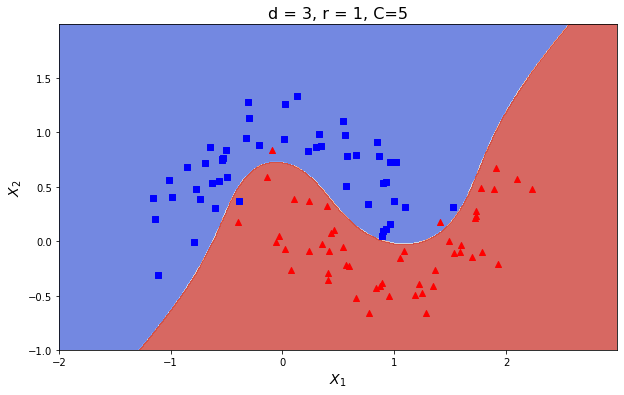

In [22]:
plt.figure(figsize=(10, 6))
plt.title("d = 3, r = 1, C=5", fontsize=16)
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="r", marker="^")
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="b", marker="s")
plt.show()

In [23]:
poly_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=10, coef0 = 100, C=5))
])

In [24]:
poly_kernel.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [25]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1, 2, 0.01))
Z = poly_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [26]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("d = 10, r = 100, C=5", fontsize=16)
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="r", marker="^")
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="b", marker="s")
plt.show()

## Adding Similarity Features

A useful technique to tackle non-linear datasets is to add features computed using a similarity function such as the Gaussian Radial Basis Function (RBF)

$\Large K(x_i, x_j) = \exp(-\gamma||x_i - x_j||^2).$

The kernel matrix $K_{ij}$ constructed from the RBF function is an m x m square matrix. RBF function is computed using the Euclidean distance between pairs of instances.

$\gamma$ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐
fitting, you should increase it (similar to the C hyperparameter).

## Gaussian RBF Kernel

In [27]:
rbf_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

In [28]:
rbf_kernel.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [29]:
xx, yy = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1, 2, 0.01))
Z = rbf_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [30]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.title("$\gamma$ = 5, C=0.001", fontsize=16)
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$X_2$", fontsize=14)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="r", marker="^")
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="b", marker="s")
plt.show()

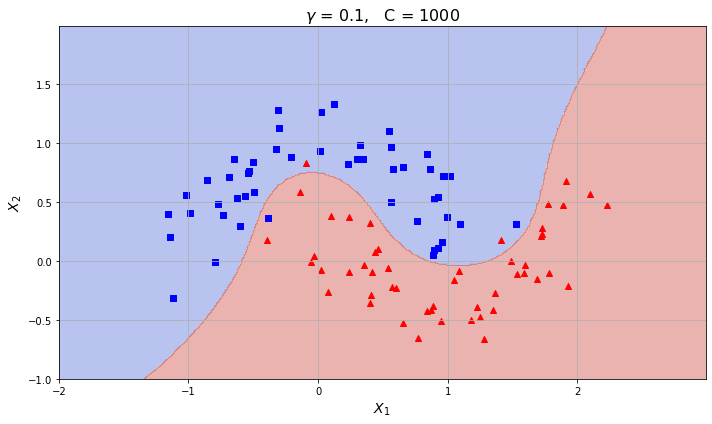

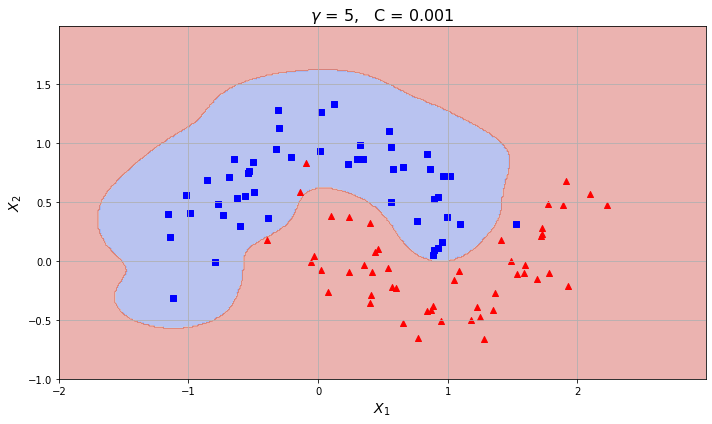

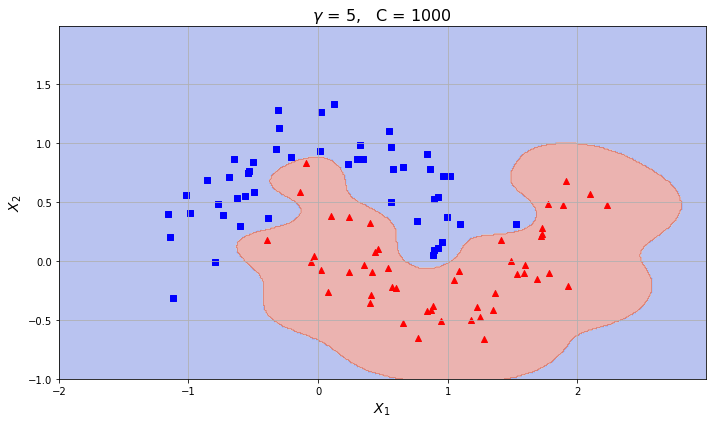

In [31]:
C = [0.001, 1000]
gamma = [0.1, 5]

for i in range(len(gamma)):
    for j in range(len(C)):
        rbf_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=gamma[i], C=C[j]))
])
        rbf_kernel.fit(X, y)
        xx, yy = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1, 2, 0.01))
        Z = rbf_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplots(1,1, figsize=(10, 6))
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
        plt.title("$\gamma$ = " + str(gamma[i]) + ",   C = " + str(C[j]), fontsize=16)
        plt.xlabel("$X_1$", fontsize=14)
        plt.ylabel("$X_2$", fontsize=14)
        plt.grid()
        plt.scatter(X[y==1][:,0], X[y==1][:,1], c="r", marker="^")
        plt.scatter(X[y==0][:,0], X[y==0][:,1], c="b", marker="s")
        plt.tight_layout()
        plt.show()

# SVM Regression

## Linear Regression

In [124]:
from sklearn.svm import LinearSVR

In [125]:
X = 6*np.random.rand(100, 1) - 3
y = 3 + 4*X + np.random.randn(100, 1)

In [126]:
Linear_SVR = LinearSVR(epsilon = 0.8)

In [127]:
Linear_SVR.fit(X, y.ravel())

LinearSVR(epsilon=0.8)

In [128]:
Linear_SVR.intercept_, Linear_SVR.coef_

(array([3.15163092]), array([3.94103799]))

## Non-Linear Regression

In [139]:
from sklearn.svm import SVR

In [140]:
X = 6*np.random.rand(100, 1) - 3
y = 5 + 4*X + 2*X**2

In [141]:
SVR = SVR(kernel='poly', degree=2, C=50, epsilon=0.1)

In [142]:
SVR.fit(X, y.ravel())

SVR(C=50, degree=2, kernel='poly')